In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
img = cv2.imread("dog.jpg")

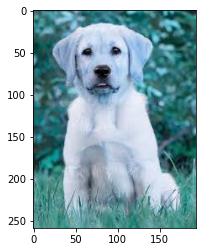

In [37]:
plt.imshow(img)

# Britghtening & Darkening

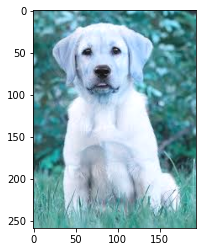

In [5]:
img_bright = cv2.add(img, np.array([20.0]))
plt.imshow(img_bright)

img (x,y) += brightness

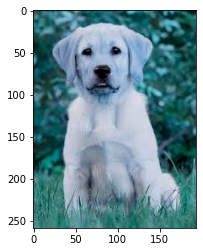

In [6]:
img_dark = cv2.add(img, np.array([-20.0]))
plt.imshow(img_dark)

# Geometrical Transformations

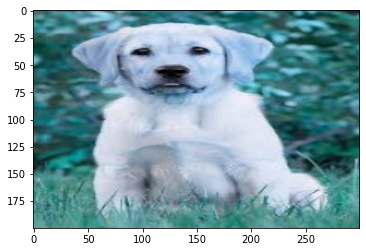

In [11]:
# Scaling
img_resize = cv2.resize(img, (300,200))
plt.imshow(img_resize)

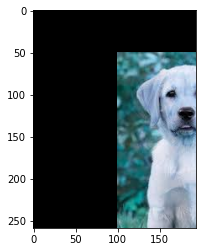

In [13]:
# Translation
rows, cols, channel = img.shape
M =np.float32([[1,0,100],[0,1,50]])
translate_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(translate_img)

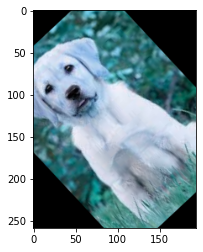

In [16]:
#Rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2), 43, 1) #location, degree, zoom
rotated_img = cv2.warpAffine(img, M, (cols,rows))
plt.imshow(rotated_img)

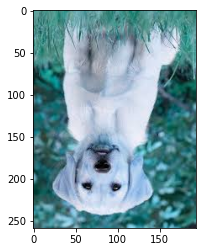

In [18]:
# Flip
flipped_img = cv2.flip(img, 0)
plt.imshow(flipped_img)

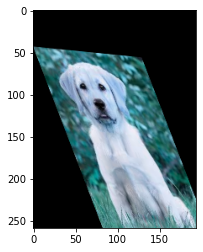

In [20]:
# Affine
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[50,90],[150,100],[100,220]])
M = cv2.getAffineTransform(pts1,pts2)
affine_tf_img = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(affine_tf_img)

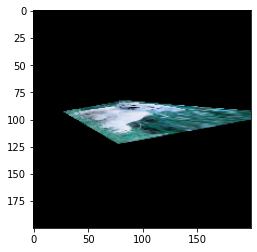

In [29]:
# Perspective
pts1 = np.float32([[400,400],[268,52],[28,387],[300,300]])
pts2 = np.float32([[0,0],[600,150],[0,100],[1000,1000]])

M = cv2.getPerspectiveTransform(pts1,pts2)
perspective_img = cv2.warpPerspective(img,M,(200,200))
plt.imshow(perspective_img)


In [27]:
M

array([[ 7.45768254e-03, -2.13404454e-01,  8.23787087e+01],
       [-2.46987928e-01,  4.10411568e-02,  8.23787087e+01],
       [-3.27825240e-03,  1.35679860e-05,  1.00000000e+00]])

# Blurring & Sharpening Images

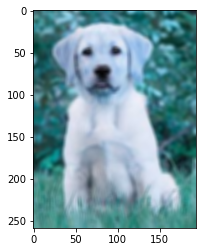

In [30]:
blur_img = cv2.blur(img, (5,5))
plt.imshow(blur_img)

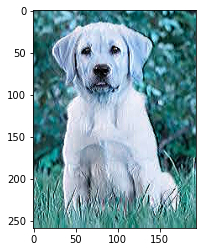

In [45]:
kernel = np.array([[0,0,0],[0,0,0],[-2,3,0]],np.float32)
sharp_img = cv2.filter2D(img,-1,kernel)
plt.imshow(sharp_img)

# Image Pyramids & Blending

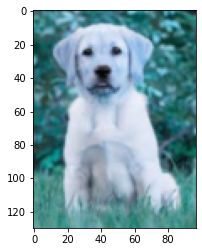

In [46]:
# Image Pyramids
lower_res = cv2.pyrDown(img)
plt.imshow(lower_res)

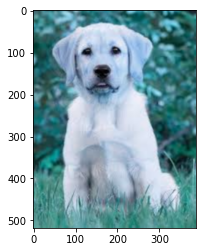

In [47]:
upper_res = cv2.pyrUp(img)
plt.imshow(upper_res)

In [53]:
forest = cv2.imread("forest.jpg")

In [54]:
print(img.shape)
print(forest.shape)

(259, 194, 3)
(400, 600, 3)


In [55]:
img_resized = cv2.resize(img,(600,400))
img_resized.shape

(400, 600, 3)

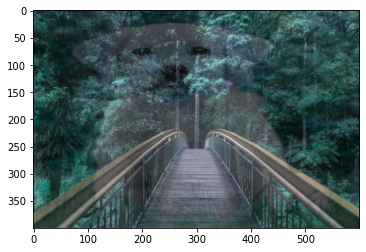

In [59]:
# Image blending
blended_img = cv2.addWeighted(img_resized,0.3,forest,0.7,0)
plt.imshow(blended_img)

# Bitwise operators

In [4]:
cv2.namedWindow('Tracking')
cv2.createTrackbar("LH", "Tracking", 0, 255, lambda x:x)
cv2.createTrackbar("LS", "Tracking", 0, 255, lambda x:x)
cv2.createTrackbar("LV", "Tracking", 0, 255, lambda x:x)
cv2.createTrackbar("UH", "Tracking", 0, 255, lambda x:x)
cv2.createTrackbar("US", "Tracking", 0, 255, lambda x:x)
cv2.createTrackbar("UV", "Tracking", 0, 255, lambda x:x)

while True:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    l_h = cv2.getTrackbarPos("LH",'Tracking')
    l_s = cv2.getTrackbarPos("LS",'Tracking')
    l_v = cv2.getTrackbarPos("LV",'Tracking')
    u_h = cv2.getTrackbarPos("UH",'Tracking')
    u_s = cv2.getTrackbarPos("US",'Tracking')
    u_v = cv2.getTrackbarPos("UV",'Tracking')
    
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, lower_range, upper_range)
    
    result = cv2.bitwise_and(img, img, mask=mask)
    
    cv2.imshow("Frame",img)
    cv2.imshow("mask",mask)
    cv2.imshow("Result",result)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
        
cv2.destroyAllWindows()

<function destroyAllWindows>

# Image thresholding

In [40]:
 img = cv2.imread('dog.jpg',0)

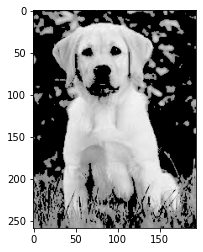

In [41]:
ret, thresh_img = cv2.threshold(img, 128, 55, cv2.THRESH_TOZERO)
plt.imshow(thresh_img,cmap = 'gray')

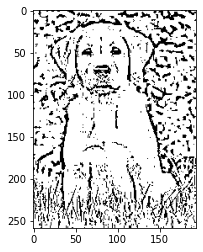

In [42]:
adaptive_thresh_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(adaptive_thresh_img, cmap = 'gray')

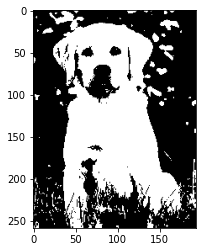

In [43]:
ret, otsu_Thresh_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_Thresh_img, cmap = 'gray')

# Image gradients

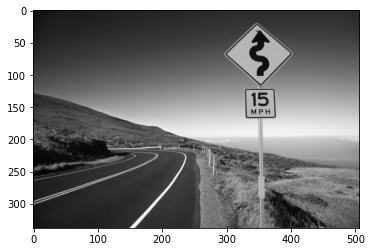

In [77]:
img = cv2.imread('roadsign.jpg',0)
plt.imshow(img, cmap = 'gray')

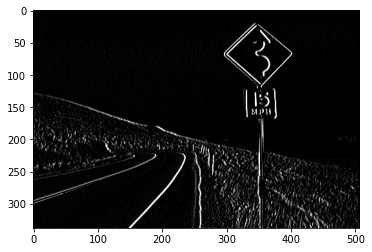

In [21]:
# Sobel X : show vertical lines in an image

kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
sobel_x_img = cv2.filter2D(img,-1,kernel)
plt.imshow(sobel_x_img, cmap = 'gray')

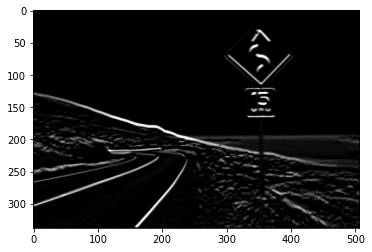

In [25]:
# Sobel Y: show horizontal lines in an image

kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)
sobel_y_blur_img = cv2.blur(img,(4,4))
sobel_y_img = cv2.filter2D(sobel_y_blur_img,-1,kernel)
plt.imshow(sobel_y_img, cmap = 'gray')

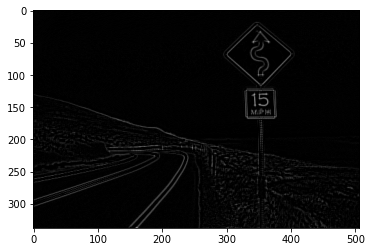

In [26]:
# Laplacian
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]],np.float32)
laplacian_blur_img = cv2.blur(img,(4,4))
laplacian_img = cv2.filter2D(laplacian_blur_img,-1,kernel)
plt.imshow(laplacian_img, cmap = 'gray')

# Morphological Operators

In [28]:
# Erosion
kernel = np.ones((5,5),np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

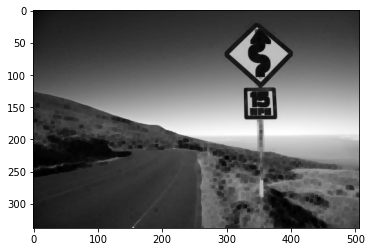

In [30]:
img_erosion = cv2.erode(img,kernel,iterations=1)
plt.imshow(img_erosion,cmap='gray')

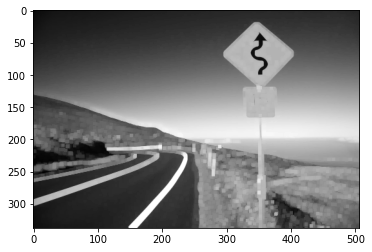

In [31]:
img_dilation = cv2.dilate(img,kernel,iterations=1)
plt.imshow(img_dilation,cmap='gray')

# Templet Matching

[[0.33591217 0.35215032 0.36759162 ... 0.11756241 0.10689425 0.09775081]
 [0.34513643 0.36247987 0.3793292  ... 0.13169108 0.12070584 0.1112748 ]
 [0.35527417 0.37367123 0.3917537  ... 0.14826843 0.13680355 0.12692116]
 ...
 [0.10017092 0.10190853 0.10473099 ... 0.13097385 0.13090889 0.13591649]
 [0.09709472 0.0991938  0.10195484 ... 0.12657352 0.12655741 0.13160706]
 [0.09455562 0.09703901 0.09977154 ... 0.1226751  0.12303739 0.12822066]]


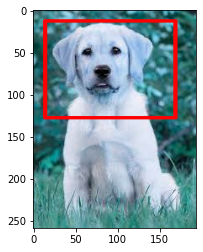

In [52]:
img = cv2.imread('dog.jpg')
face_img = cv2.imread('dogface.png')

h,w,channel = face_img.shape
result = cv2.matchTemplate(img,face_img,cv2.TM_CCOEFF_NORMED)
threshold = 0.9
location = np.where(result >= threshold)


for point in zip(*location[::-1]):
    cv2.rectangle(img,point,(point[0]+w, point[1]+h), (255,0,0), 1)
    
plt.imshow(img)

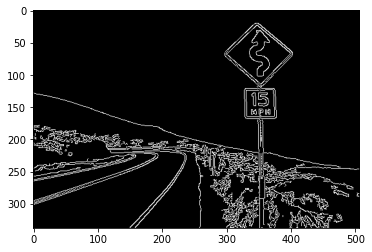

In [78]:
# Canny edge detector
img = cv2.imread('roadsign.jpg')
canny_img = cv2.Canny(img, 100,350)
plt.imshow(canny_img, cmap='gray')

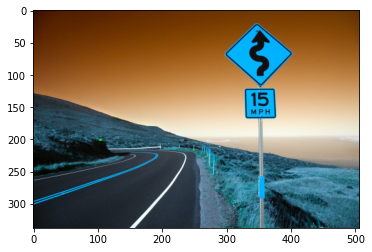

In [79]:
# Hough transform

lines = cv2.HoughLinesP(canny_img, 1, np.pi/180, 100)
for x1, y1, x2, y2 in lines[0,:]:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
plt.imshow(img)

# Contours